In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X_train = np.array([
    [2104, 5],  
    [1416, 3],
    [852,  2],  
])

y_train = np.array([460, 232, 178])


In [80]:
def compute_model_output(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [81]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [82]:
def form_contour_plot_two_features(X_train, y_train, w, b):
    """
    Contour plot for linear regression with two weights (w1, w2) and bias b.
    Left: actual vs predicted (index-based)
    Right: contour of Cost(w1, w2) holding b fixed, centered around learned w.
    """
    # Predictions & cost at the provided (w,b)
    y_pred = compute_model_output(X_train, w, b)
    cost = compute_cost(X_train, y_train, w, b)

    # Plot setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # LEFT PLOT: Actual vs Predicted (index on x-axis)
    idx = np.arange(len(y_train))
    ax1.scatter(idx, y_train, marker='x', c='r', s=100, label='Actual Value')
    ax1.scatter(idx, y_pred, c='b', marker='o', label='Prediction')
    for i in range(len(y_train)):
        ax1.vlines(idx[i], y_pred[i], y_train[i], color='purple', linestyle='dotted')
        ax1.text(idx[i] + 0.05, (y_pred[i] + y_train[i]) / 2,
                 f"{int((y_pred[i] - y_train[i])**2)}", color="purple", fontsize=9)
    ax1.set_title("Housing Prices (2 features)")
    ax1.set_xlabel("Training example index")
    ax1.set_ylabel("Price (in 1000s of dollars)")
    ax1.legend()
    ax1.grid(alpha=0.2)
    ax1.text(0.02, 0.95, f"Cost @ (w,b) = {cost:.2f}", transform=ax1.transAxes,
             verticalalignment='top', color='purple')

    # RIGHT PLOT: Contour of Cost(w1, w2) around learned weights
    # Center grid around current w to get a meaningful zoom
    w0, w1 = float(w[0]), float(w[1])
    margin1 = max(10, abs(w0) * 0.6)
    margin2 = max(10, abs(w1) * 0.6)

    w1_vals = np.linspace(w0 - margin1, w0 + margin1, 150)
    w2_vals = np.linspace(w1 - margin2, w1 + margin2, 150)

    J_vals = np.zeros((len(w2_vals), len(w1_vals)))  # shape matches meshgrid(w1_vals, w2_vals)
    for i_w1, w1v in enumerate(w1_vals):
        for j_w2, w2v in enumerate(w2_vals):
            w_temp = np.array([w1v, w2v])
            J_vals[j_w2, i_w1] = compute_cost(X_train, y_train, w_temp, b)

    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    # contour levels chosen between min and max of J_vals
    Jmin, Jmax = J_vals.min(), J_vals.max()
    # choose some levels - logspace can be problematic if Jmin is 0, so use linspace
    levels = np.linspace(Jmin, Jmax, 30)
    cp = ax2.contour(W1, W2, J_vals, levels=levels, cmap="rainbow")
    ax2.clabel(cp, inline=True, fontsize=8)

    # Mark current weights
    ax2.scatter(w0, w1, c='b', s=100, marker='o', label='current (w1,w2)')
    ax2.vlines(w0, w2_vals.min(), w1, color='purple', linestyle='dotted')
    ax2.hlines(w1, w1_vals.min(), w0, color='purple', linestyle='dotted')

    ax2.set_title("Cost(w1, w2) (bias fixed)")
    ax2.set_xlabel("w1")
    ax2.set_ylabel("w2")
    ax2.legend()
    ax2.grid(alpha=0.2)

    plt.tight_layout()
    plt.show()


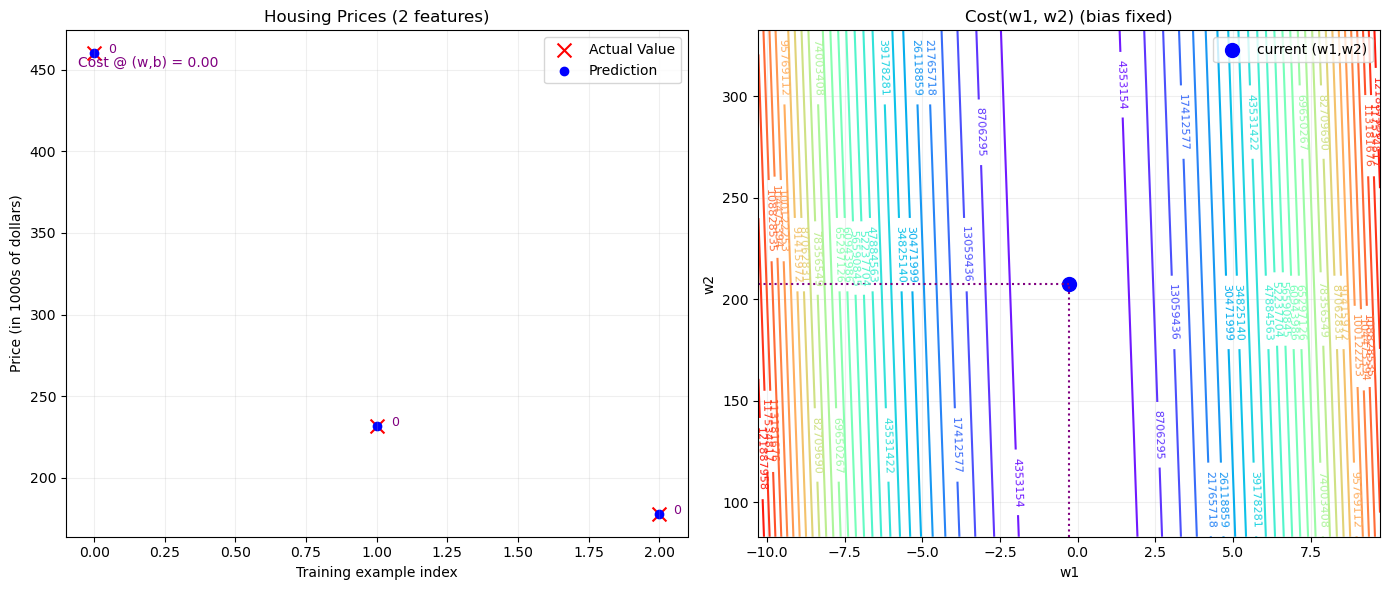

In [83]:
form_contour_plot_two_features(X_train, y_train, w = np.array([-0.27272727, 207.81818182]), b=-5.27272727275691)

you can see that contour plot is not circular, it's eliptical
also, w1 and w2 are on different scales